### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course Docker environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you the following steps before submission for ensuring that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [ ]:
# nb_fname = "XXX.ipynb"
nb_fname = "HA1.ipynb"

### Fill in group number and member names:

In [2]:
GROUP = "Project and HA1 26"
NAME1 = "Xiaofeng Wang"
NAME2 = "Vasiliki Lamprousi"

### Check Python version

In [ ]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Docker environment, or alternatively in the provided Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [ ]:
import os
nb_dirname = os.path.abspath('')
assert nb_dirname != '/workspace', \
    '[ERROR] The notebook server appears to have been started via Docker, at the same directory as the assignment. Make sure to start it at least one level above the assignment.'
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [ ]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [ ]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

# HA1 - Cats and dogs

<img src="http://lghttp.32478.nexcesscdn.net/80E972/organiclifestylemagazine/wp-content/uploads/2015/10/Cats-and-Dogs.jpg" alt="Cats and dogs" style="width: 5000px;"/>

For this home assignment, we'll use the Kaggle dataset for the [Dogs vs. Cats competition](https://www.kaggle.com/c/dogs-vs-cats). It is comprised of 25k colored images of dogs and cats. Our goal with this dataset will be to create a classifier that can tell us if the input image is of a cat or a dog.

As a way of helping you speed up the training process, each group gets access to an instance in Google Cloud with a K80 GPU. Take a look at the [Instructions folder](https://github.com/JulianoLagana/deep-machine-learning/blob/master/Instructions/03_using_google_cloud.md) to understand how to connect to this instance and use our tools there. You're free to use this limited resource as you see fit, but if you spend all your credits, you'll need a late day to obtain more (and you can only do this once).

In order to make the most out of your GPU hours, first try solving the initial part of this notebook (tasks 0-3) in your own computer (these tasks can be solved only on the CPU), and leave most of the available hours for solving tasks 4-5, and refining your best model further (and, if you have the spare hours, experiment a bit!).

Requirements:
- Whenever we ask you to plot anything, be sure to add a title and label the axes. If you're plotting more than one curve in the same plot, also add a legend.
- When we ask you to train an architecture, train it for a reasonable number of epochs. "Reasonable" here means you should be fairly confident that training for a higher number of epochs wouldn't impact your conclusions regarding the model's performance.


Hints:
- If you get errors saying you've exhausted the GPU resources, well, then you exhausted the GPU resources. However, sometimes that's because Pytorch didn't release a part of the GPU's memory. If you think your CNN should fit in your memory during training, try restarting the kernel and directly training only that architecture.
- Every group has enough credits on google cloud to complete this assignment. However, this statement assumes you'll use your resources judiciously (e.g. always try the code first in your machine and make sure everything works properly before starting your instances) and **won't forget to stop your instance after using it,**  otherwise you might run out of credits.
- Before starting, take a look at the images we'll be using. This is a hard task, don't get discouraged if your first models perform poorly (several participants in the original competition didn't achieve an accuracy higher than 60%).
- Solving the [computer labs](https://github.com/JulianoLagana/deep-machine-learning/tree/master/computer-labs) is a good way to get prepared for this assignment.

---
## 0. Imports

In the following cell, add all the imports you'll use in this assignment.

In [3]:
# YOUR CODE HERE
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

# For neural net architecture 
import torch
import torch.nn as nn
from torchvision import datasets ,models,transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim import lr_scheduler
import torch.optim as optim
from pathlib import Path
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

# Store the home path
home_path = os.getcwd()

---
## 1. Loading the data and preprocessing

The first step is to head to the [Kaggle website for the cats and dogs competition](https://www.kaggle.com/c/dogs-vs-cats) and download the data from there. You should download both the test and train folders together in one zip file (by clicking the download all button). The split ratio between training and validation has not been made, you'll need to do it yourself. The `test.zip` file contains unlabeled data, so that participants in the contest are not able to train on this set.

Downloading the data to the Google Cloud instance can be a bit tricky. There are a few ways to do it:

 - Using `scp` with the `gcloud` CLI. Download the `dogs-vs-cats.zip` to your local computer and then copy it from there to your cloud instance with the command:
 ```
 # Note: This assumes you named your VM instance (gpu-instance)
 gcloud compute scp  <path_to_local_file>/dogs-vs-cats.zip dml-host@gpu-instance:~/deep-machine-learning/home-assignments/HA1/
 ```
 `scp` uses the same credentials as `ssh`, which `gcloud` handles for you. The first time you `ssh` directly into `dml-host` you have to set a password for your `ssh` keys
 - Using the Kaggle CLI. We have it installed in the docker image, and you can read about it [here](https://github.com/Kaggle/kaggle-api) 

For this assignment you should use [data generators](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) to load the images to your CPU/GPU memory. Because of this, your folder structure for the data should conform to the folder structure expected by the data generators (i.e. the samples should be separated into one folder for each class). Furthermore, we ask you to first start with a smaller subset of the data (1/5 of the number of samples), in order to test different models faster.

This means that you should create a folder structure that resembles the following (obviously, the folder names are up to you):


         small_train             small_val                train                   val
              |                      |                      |                      |
              |                      |                      |                      |
        -------------          -------------          -------------          -------------
        |           |          |           |          |           |          |           |
        |           |          |           |          |           |          |           |
      Cats        Dogs       Cats        Dogs       Cats        Dogs       Cats        Dogs

The `small_train` and `small_val` folders have the training and validation samples for your smaller subset of the data, while the `train` and `val` folders contain all the samples you extracted from Kaggle's `train.zip`. We provide you a notebook that shows how to achieve this (`create_project_notebook_structure.ipynb`), starting from the original `dogs-vs-cats.zip` file that you download from Kaggle. If you do use that notebook, we encourage you to understand how each step is being done, so you can generalize this knowledge to new datasets you'll encounter.

We advise you to use 30% of the data as validation data in the smaller dataset. However, for the larger dataset, you should decide how to split between training and validation. Please specify your splits in the following cells.

For the larger subset, what was the training/validation split that you decided to use?

**% Samples in the training set:**

**Your answer:** (fill in here)<br>
The total number of images (larger subset) is 12500 cats and 12500 dogs. We split 70% for training. So we have 8750 cats and 8750 dogs.

In [5]:
# Counting images
#os.chdir(home_path + '/data/train/cats')
os.chdir(home_path + '/train/cats')
n_train_cats = len(os.listdir())
#os.chdir(home_path + '/data/train/dogs')
os.chdir(home_path + '/train/dogs')
n_train_dogs = len(os.listdir())
#os.chdir(home_path + '/data/val/cats')
os.chdir(home_path + '/val/cats')
n_val_cats = len(os.listdir())
#os.chdir(home_path + '/data/val/dogs')
os.chdir(home_path + '/val/dogs')
n_val_dogs = len(os.listdir())

# Sum up the images
n_val = n_val_cats + n_val_dogs
n_train = n_train_cats + n_train_dogs
n_total = n_val + n_train

# Print output for the training set
print('Train set with {} images of cats.'.format(n_train_cats))
print('Train set with {} images of dogs.'.format(n_train_dogs))
print('Train set with total {} images.'.format(n_train))
print('Percentage of samples for the training samples is {}%.'.format(100*n_train/n_total))

Train set with 8750 images of cats.
Train set with 8750 images of dogs.
Train set with total 17500 images.
Percentage of samples for the training samples is 70.0%.


**% Samples in the validation set:**

**Your answer:** (fill in here)<br>
The total number of images (larger subset) is 12500 cats and 12500 dogs. We split 30% for validation. So we have 3750 cats and 3750 dogs.

In [6]:
# Print output for the validation set
print('Validation set with {} images of cats.'.format(n_val_cats))
print('Validation set with {} images of dogs.'.format(n_val_dogs))
print('Validation set with total {} images.'.format(n_val))

print('Percentage of samples for the validation set is {}%.'.format(100*n_val/n_total))

Validation set with 3750 images of cats.
Validation set with 3750 images of dogs.
Validation set with total 7500 images.
Percentage of samples for the validation set is 30.0%.


**Optional (1 POE):** Would you keep the same ratio split between train and validation sets if you had a large dataset compared to if you had a smaller one?


**Your answer:** (fill in here)<br>
The dataset split ratio mainly depends on two things. First, the total number of samples in our data and second, on the actual model we are training.<br>
Some models need substantial data to train upon, so in this case we would optimize for the larger training sets. Models with very few hyperparameters will be easy to validate and tune, so we can probably reduce the size of your validation set, but if our model has many hyperparameters, we would want to have a large validation set as well (although we should also consider cross validation). Also, if we happen to have a model with no hyperparameters or ones that cannot be easily tuned, we probably don’t need a validation set too.<br>
Therefore, the dataset split ratio is quite specific to our use case, not just decided by a large or a smaller dataset.

Fill in the dataset paths (to be used later by your data generators):

In [7]:
# TODO: Change the directories accordingly
os.chdir(home_path)
train_path = Path(home_path + '/train')
val_path = Path(home_path + '/val')
small_train_path = Path(home_path + '/small_train')
small_val_path = Path(home_path + '/small_val')

---
### 1.1 Preprocessing
**(2 POE)** 

Once you have the expected folder structure, create two data generators for automatically generating batches from the images in your smaller subset of data. Don't use any [data augmentation](https://cartesianfaith.com/2016/10/06/what-you-need-to-know-about-data-augmentation-for-machine-learning/), but feel free to preprocess the data as you see fit. 

Hints:
- Take a look at [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) and [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) from the pytorch docs.
- To preprocess the data you can use the built-in pytorch [Transforms](https://pytorch.org/docs/stable/torchvision/transforms.html)
- The specified `batch_size` should be chosen so that you don't run out of memory.
- The `DataLoader` constructor takes an optional argument `num_workers`, which defaults to `0` if not provided. Setting a higher number creates multiple threads which load batches concurrently. This can speed up training considerably. However, for multi-threading to work, you need to add `--ipc host` to your `docker run` command.  
- When feeding the images to your CNN, you'll probably want all of them to have the same spatial size, even though the .jpeg files differ in this. Resizing the images can be done using the previously mentioned built-in pytorch Transforms.
- Resizing the images to a smaller size while loading them can be beneficial. However, the VGG network that is used later in this assignment requires that images are at least 224x224.

In [8]:
# YOUR CODE HERE
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32

# convert data to a normalized torch.FloatTensor
train_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

val_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# choose the training and test datasets
small_train_data = datasets.ImageFolder(small_train_path, transform=train_transforms)
small_valid_data = datasets.ImageFolder(small_val_path,transform=val_transforms)

# prepare data loaders (combine dataset and sampler)
small_train_loader = torch.utils.data.DataLoader(small_train_data, batch_size=batch_size, num_workers=num_workers,shuffle=True)
small_valid_loader = torch.utils.data.DataLoader(small_valid_data, batch_size=batch_size,  num_workers=num_workers,shuffle=True)

---
## 2. Training

**(1 POE)**

Create your first CNN architecture for this task. Start with something as simple as possible, that you're almost sure can get an accuracy better than 50% (we'll improve upon it later).

In [9]:
# YOUR CODE HERE
class CNN_Model(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolution 1 , input_shape=(3,224,224)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5) #output_shape=(8,220,220)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=5) #output_shape=(8,106,106)
        self.fc1 = nn.Linear(8*53*53, 128)
        self.fc2 = nn.Linear(128, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x)) # Convolution 1
        x = F.max_pool2d(x, kernel_size=2) #output_shape=(8,110,110)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2) #output_shape=(8,53,53)
        x = x.view(-1, 53*53*8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
smallmodel = CNN_Model()

Train your model using the two data generators you created earlier. Train for a reasonable amount of epochs, so as to get a good sense of how well this architecture performs.

Hints:
- Note that you will need to plot your training and validation losses and accuracies, so make sure that you saved them during training. 

In [10]:
# The following line automatically figures out what device (cpu or gpu)
# you are using and transfers your model to it 
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")

# Any pytorch object (e.g. model, inputs, output, etc.) can 
# be transferred to the current device by running
#       name_of_object.to(device)
# Example:
#       model.to(device)

# YOUR CODE HERE
smallmodel.to(device)

CNN_Model(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=22472, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

In [11]:
loss_fn = nn.CrossEntropyLoss()

def evaluate_model(loader, dataset, model, loss_fn):
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in loader:
            b_x = b_x.to(device)
            b_y = b_y.to(device)
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
        val_accuracy = accuracy_score(b_y.cpu(), hard_preds.cpu())
        val_avg_loss = sum(losses)/len(losses)    
    
    return val_accuracy, val_avg_loss

Epoch 0 	Loss (train): 0.661 	Loss (val): 0.641	Accuracy (train): 0.67 	Accuracy (val): 0.68
Epoch 1 	Loss (train): 0.601 	Loss (val): 0.636	Accuracy (train): 0.75 	Accuracy (val): 0.68
Epoch 2 	Loss (train): 0.501 	Loss (val): 0.651	Accuracy (train): 0.75 	Accuracy (val): 0.68
Epoch 3 	Loss (train): 0.332 	Loss (val): 0.796	Accuracy (train): 0.75 	Accuracy (val): 0.57
Epoch 4 	Loss (train): 0.172 	Loss (val): 0.951	Accuracy (train): 1.00 	Accuracy (val): 0.75
Epoch 5 	Loss (train): 0.052 	Loss (val): 1.442	Accuracy (train): 1.00 	Accuracy (val): 0.57
Epoch 6 	Loss (train): 0.023 	Loss (val): 1.620	Accuracy (train): 1.00 	Accuracy (val): 0.64
Epoch 7 	Loss (train): 0.010 	Loss (val): 1.842	Accuracy (train): 1.00 	Accuracy (val): 0.75
Epoch 8 	Loss (train): 0.006 	Loss (val): 2.032	Accuracy (train): 1.00 	Accuracy (val): 0.89
Epoch 9 	Loss (train): 0.009 	Loss (val): 2.077	Accuracy (train): 1.00 	Accuracy (val): 0.68


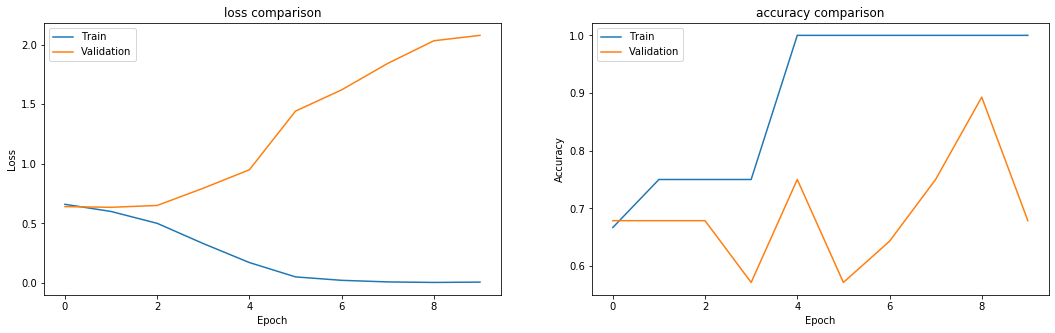

In [12]:
optimizer = optim.Adam(smallmodel.parameters(), lr=0.001)
train_accs=[]
train_losses=[]
val_accs=[]
val_losses=[]
for epoch in range(10):
    losses = []
    n_correct = 0
    for b_x, b_y in small_train_loader:
        
        # Compute predictions and losses
        b_x = b_x.to(device)
        b_y = b_y.to(device)
        pred = smallmodel(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        
        # Count number of correct predictions
        hard_preds = pred.argmax(dim=1)
        acc_t=accuracy_score(b_y.cpu(), hard_preds.cpu())

        # Backpropagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    # Compute accuracy and loss in the entire training set
    train_accs.append(acc_t)
    train_losses.append(sum(losses)/len(losses))
        
    # Compute accuracy and loss in the entire validation set
    val_accuracy, val_loss = evaluate_model(small_valid_loader, small_valid_data, smallmodel, loss_fn)
    val_accs.append(val_accuracy)
    val_losses.append(val_loss)
    
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss (train): {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy (train): {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_losses[epoch], val_losses[epoch], train_accs[epoch], val_accs[epoch]))
    
# Plotting the training accuracy
fig = plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('loss comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Plotting the validation accuracy
plt.subplot(1,2,2)
plt.plot(train_accs)
plt.plot(val_accs)
plt.title('accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Show the plots
plt.show()  

**(2 POE)** Based on these, what would you suggest for improving your model? Why?

**Your answer:** (fill in here)<br>
We have a overfitting problem since the loss of training dataset is so small and the accuracy for training dataset is 1. To solve this problem, we need more data or use smaller learning rate.

---
## 3. Improving your model

**(1 POE)** Continue to improve your model architecture by comparing the value of the metrics you're interested in both the training and validation set. Try different ideas! When you're happy with one architecture, copy it in the cell below and train it here. Save the training and validation losses and accuracies. You'll use this later to compare your best model with the one using transfer learning.

**Note**: When trying different ideas, you'll end up with several different models. However, when submitting your solutions to Canvas, the cell below must contain only the definition and training of *one* model. Remove all code related to the models that were not chosen.

In [13]:
# YOUR CODE HERE
class New_Model(nn.Module):
    def __init__(self):
        super(New_Model, self).__init__()
        # Convolution 1 , input_shape=(3,224,224)
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0) #output_shape=(16,220,220) #(224-5+1)/1 #(weigh-kernel+1)/stride 無條件進位
        self.relu1 = nn.ReLU() # activation
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2) #output_shape=(16,110,110) #(220/2)
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0) #output_shape=(32,106,106)
        self.relu2 = nn.ReLU() # activation
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2) #output_shape=(32,53,53)
        # Convolution 3
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=0) #output_shape=(16,51,51)
        self.relu3 = nn.ReLU() # activation
        # Max pool 3
        self.maxpool3 = nn.MaxPool2d(kernel_size=2) #output_shape=(16,25,25)
        # Convolution 4
        self.cnn4 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding=0) #output_shape=(8,23,23)
        self.relu4 = nn.ReLU() # activation
        # Max pool 4
        self.maxpool4 = nn.MaxPool2d(kernel_size=2) #output_shape=(8,11,11)
        # Fully connected 1 ,#input_shape=(8*12*12)
        self.fc1 = nn.Linear(8 * 11 * 11, 512) 
        self.relu5 = nn.ReLU() # activation
        self.fc2 = nn.Linear(512, 2) 
        self.output = nn.Softmax(dim=1)
        
    
    def forward(self, x):
        out = self.cnn1(x) # Convolution 1
        out = self.relu1(out)
        out = self.maxpool1(out)# Max pool 1
        out = self.cnn2(out) # Convolution 2
        out = self.relu2(out) 
        out = self.maxpool2(out) # Max pool 2
        out = self.cnn3(out) # Convolution 3
        out = self.relu3(out)
        out = self.maxpool3(out) # Max pool 3
        out = self.cnn4(out) # Convolution 4
        out = self.relu4(out)
        out = self.maxpool4(out) # Max pool 4
        out = out.view(out.size(0), -1) # last CNN faltten con. Linear NN
        out = self.fc1(out) # Linear function (readout)
        out = self.fc2(out)
        out = self.output(out)

        return out
    
newmodel = New_Model()
newmodel.to(device)

New_Model(
  (cnn1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn4): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
  (relu4): ReLU()
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=968, out_features=512, bias=True)
  (relu5): ReLU()
  (fc2): Linear(in_features=512, out_features=2, bias=True)
  (output): Softmax(dim=1)
)

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

Epoch 0 	Loss (train): 0.693 	Loss (val): 0.692	Accuracy (train): 0.33 	Accuracy (val): 0.43
Epoch 1 	Loss (train): 0.691 	Loss (val): 0.690	Accuracy (train): 0.42 	Accuracy (val): 0.50
Epoch 2 	Loss (train): 0.688 	Loss (val): 0.687	Accuracy (train): 0.75 	Accuracy (val): 0.57
Epoch 3 	Loss (train): 0.682 	Loss (val): 0.681	Accuracy (train): 0.33 	Accuracy (val): 0.64
Epoch 4 	Loss (train): 0.674 	Loss (val): 0.674	Accuracy (train): 0.58 	Accuracy (val): 0.71
Epoch 5 	Loss (train): 0.666 	Loss (val): 0.668	Accuracy (train): 0.58 	Accuracy (val): 0.71
Epoch 6 	Loss (train): 0.658 	Loss (val): 0.661	Accuracy (train): 0.67 	Accuracy (val): 0.61
Epoch 7 	Loss (train): 0.651 	Loss (val): 0.656	Accuracy (train): 0.58 	Accuracy (val): 0.61
Epoch 8 	Loss (train): 0.645 	Loss (val): 0.652	Accuracy (train): 0.50 	Accuracy (val): 0.64
Epoch 9 	Loss (train): 0.641 	Loss (val): 0.649	Accuracy (train): 0.67 	Accuracy (val): 0.64


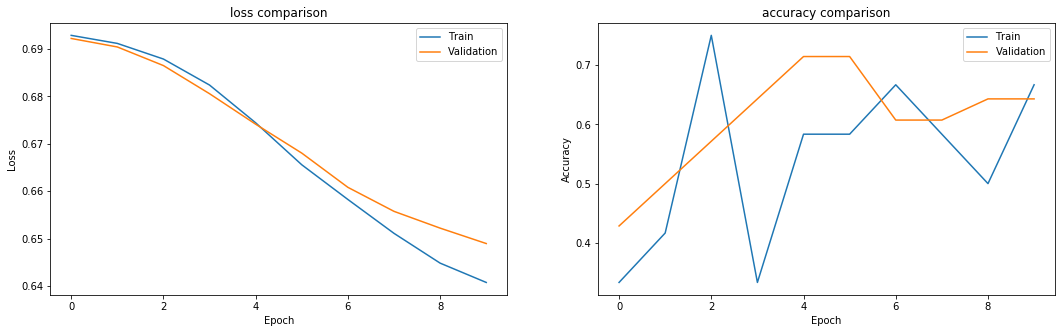

In [14]:
# YOUR CODE HERE
train_accs_new=[]
train_losses_new=[]
val_accs_new=[]
val_losses_new=[]
optimizer_new = optim.Adam(newmodel.parameters(), lr=0.00001)
for epoch in range(10):
    losses_new = []
    n_correct_new = 0
    for b_x, b_y in small_train_loader:
        b_x = b_x.to(device)
        b_y = b_y.to(device)
        # Compute predictions and losses
        pred_new = newmodel(b_x)
        loss_new = loss_fn(pred_new, b_y)
        losses_new.append(loss_new.item())
        
        # Count number of correct predictions
        hard_preds_new = pred_new.argmax(dim=1)
        acc_new_t=accuracy_score(b_y.cpu(), hard_preds_new.cpu())

        # Backpropagate
        loss_new.backward()
        optimizer_new.step()
        optimizer_new.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accs_new.append(acc_new_t)
    train_losses_new.append(sum(losses_new)/len(losses_new))
        
    # Compute accuracy and loss in the entire validation set
    val_acc_n_new, val_loss_n_new = evaluate_model(small_valid_loader, small_valid_data, newmodel, loss_fn)
    val_accs_new.append(val_acc_n_new)
    val_losses_new.append(val_loss_n_new)
        
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss (train): {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy (train): {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_losses_new[epoch], val_losses_new[epoch], train_accs_new[epoch], val_accs_new[epoch]))
    
fig = plt.figure(figsize=(18,5))

# Plotting the training accuracy
plt.subplot(1,2,1)
plt.plot(train_losses_new)
plt.plot(val_losses_new)
plt.title('loss comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Plotting the validation accuracy
plt.subplot(1,2,2)
plt.plot(train_accs_new)
plt.plot(val_accs_new)
plt.title('accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Show the plots
plt.show()  

**(2 POE)** Did your results improve? What problems did your improvements fix? Explain why, or why not. 

**Your answer:** (fill in here)<br>
We fixed the overfitting problem by using smaller learning rate. We can see the loss for training and validation dataset decrease following the epoch. The accuracy doesn't have a signficant improvement, but the accuracy is more stable than the simple model. We would say this improved model works better.

[Save your model](https://pytorch.org/tutorials/beginner/saving_loading_models.html) to disk (the architecture, weights and optimizer state). This is simply so you can use it again easily in the later parts of the notebook, without having to keep it in memory or re-training it. The actual file you create is not relevant to your submission. The code to save the model is given in the cell below. 

In [15]:
# Assuming that you called your model 'model'
torch.save(newmodel.state_dict(), 'my_model')

---
## 4. Transfer Learning

Now, instead of trying to come up with a good architecture for this task, we'll use the VGG16 architecture, but with the top layers removed (the fully connected layers + softmax). We'll substitute them with a single fully connected layer, and a classification layer that makes sense for our problem.

However, this model has a very high capacity, and will probably suffer a lot from overfitting if we try to train it from scratch, using only our small subset of data. Instead, we'll start the optimization with the weights obtained after training VGG16 on the ImageNet dataset.

Start by loading the *pretrained* VGG16 model, from the [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html).

In [16]:
# YOUR CODE HERE
import torchvision.models as models
vgg16 = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/dml-guest/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:19<00:00, 28.5MB/s] 


Create a new model with the layers you want to add on top of VGG.

*Hint:*
- You can access the top layers of the VGG model with `vgg_model.classifier`, and the remaining layers with `vgg_model.features`.
- You can get the number of output features of `vgg_model.features` with `vgg_model.classifier[0].in_features`

In [17]:
# YOUR CODE HERE
# Freeze parameters so we don't backprop through them
for param in vgg16.parameters():
    param.requires_grad = False

Now add the new model on top of VGG.

In [18]:
# YOUR CODE HERE
import torch.nn as nn
# Add on classifier
vgg16.classifier = torch.nn.Sequential(torch.nn.Linear(25088, 4096),
                                       torch.nn.ReLU(),
                                       #torch.nn.Dropout(p=0.5),
                                       torch.nn.Linear(4096, 2))

### 4.1 Using VGG features

Now we're almost ready to train the new model. However, since the top layers of this architecture are being initialized randomly, it's sometimes possible for them to generate large gradients that can wreck the pretraining of the bottom layers. To avoid this, freeze all the VGG layers in your architecture (i.e. signal to the optimizer that these should not be changed during optimization) by setting the attribute `requires_grad` for all parameters `vgg_model.features` to `False`.

In [19]:
# Freeze bottom
# YOUR CODE HERE
for param in vgg16.parameters():
    param.requires_grad = False

Perform the transfer learning by training the top layers of your model.

In [20]:
# YOUR CODE HERE
import torch.nn as nn
# Add on classifier
vgg16.classifier = torch.nn.Sequential(torch.nn.Linear(25088, 4096),
                                       torch.nn.ReLU(),
                                       #torch.nn.Dropout(p=0.5),
                                       torch.nn.Linear(4096, 2))

optimizer_vgg = torch.optim.Adam(vgg16.parameters(), lr=1e-5)   # optimize all cnn parameters
vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

Epoch 0 	Loss (train): 0.091 	Loss (val): 0.047	Accuracy (train): 0.92 	Accuracy (val): 0.93
Epoch 1 	Loss (train): 0.009 	Loss (val): 0.043	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 2 	Loss (train): 0.004 	Loss (val): 0.043	Accuracy (train): 1.00 	Accuracy (val): 0.93
Epoch 3 	Loss (train): 0.003 	Loss (val): 0.043	Accuracy (train): 1.00 	Accuracy (val): 0.96
Epoch 4 	Loss (train): 0.002 	Loss (val): 0.042	Accuracy (train): 1.00 	Accuracy (val): 0.96
Epoch 5 	Loss (train): 0.001 	Loss (val): 0.043	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 6 	Loss (train): 0.001 	Loss (val): 0.043	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 7 	Loss (train): 0.001 	Loss (val): 0.043	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 8 	Loss (train): 0.001 	Loss (val): 0.043	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 9 	Loss (train): 0.000 	Loss (val): 0.044	Accuracy (train): 1.00 	Accuracy (val): 1.00


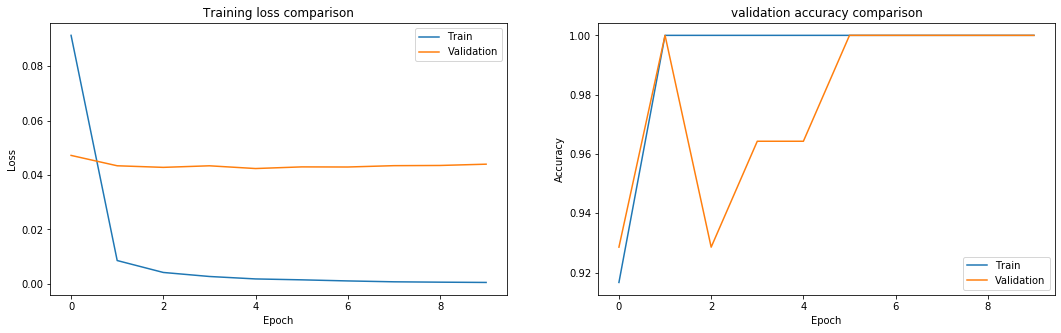

In [21]:
# YOUR CODE HERE
train_accs_vgg=[]
train_losses_vgg=[]
val_accs_vgg=[]
val_losses_vgg=[]
for epoch in range(10):
    losses_vgg = []
    n_correct_vgg = 0
    for b_x, b_y in small_train_loader:
        bx = b_x.to(device)
        by = b_y.to(device)
        # Compute predictions and losses
        pred_vgg = vgg16(bx)
        loss_vgg = loss_fn(pred_vgg, by)
        losses_vgg.append(loss_vgg.item())
        
        # Count number of correct predictions
        hard_preds_vgg = pred_vgg.argmax(dim=1)
        acc_vgg_t=accuracy_score(by.cpu(), hard_preds_vgg.cpu())

        # Backpropagate
        loss_vgg.backward()
        optimizer_vgg.step()
        optimizer_vgg.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accs_vgg.append(acc_vgg_t)
    train_losses_vgg.append(sum(losses_vgg)/len(losses_vgg))
        
    # Compute accuracy and loss in the entire validation set
    val_acc_v_vgg, val_loss_v_vgg = evaluate_model(small_valid_loader, small_valid_data, vgg16, loss_fn)
    val_accs_vgg.append(val_acc_v_vgg)
    val_losses_vgg.append(val_loss_v_vgg)
        
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss (train): {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy (train): {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_losses_vgg[epoch], val_losses_vgg[epoch], train_accs_vgg[epoch], val_accs_vgg[epoch]))
    
fig = plt.figure(figsize=(18,5))

# Plotting the training accuracy
plt.subplot(1,2,1)
plt.plot(train_losses_vgg)
plt.plot(val_losses_vgg)
plt.title('Training loss comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Plotting the validation accuracy
plt.subplot(1,2,2)
plt.plot(train_accs_vgg)
plt.plot(val_accs_vgg)
plt.title('validation accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Show the plots
plt.show()  

How does the model perform, compared to the model obtained in step 3? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

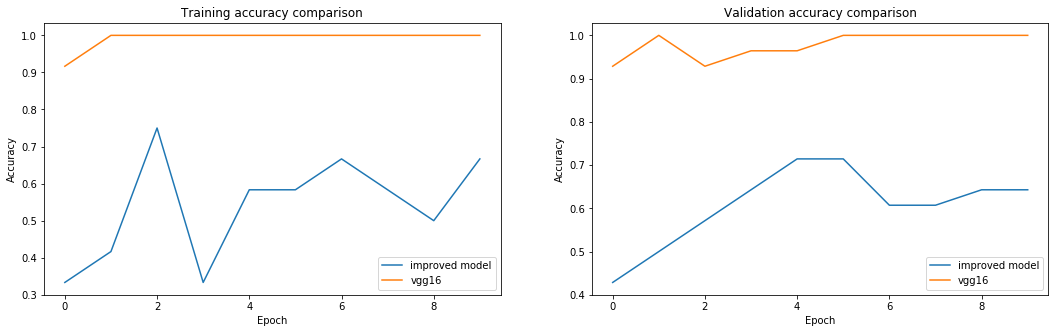

In [22]:
# YOUR CODE HERE
fig = plt.figure(figsize=(18,5))

# Plotting the training accuracy
plt.subplot(1,2,1)
plt.plot(train_accs_new)
plt.plot(train_accs_vgg)
plt.title('Training accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['improved model','vgg16'])

# Plotting the validation accuracy
plt.subplot(1,2,2)
plt.plot(val_accs_new)
plt.plot(val_accs_vgg)
plt.title('Validation accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['improved model','vgg16'])

# Show the plots
plt.show()

**(1 POE)** Compare these results. Which approach worked best, starting from scratch or doing transfer learning? Explain how you evaluated this.

**Your answer:** (fill in here)<br>
The accuracy for training and validation datset is obviously higher when we use vgg16 which means transfer learning works better. 

**(1 POE)** What are the main differences between the ImageNet dataset and the Dogs vs Cats dataset we used?

**Your answer:** (fill in here)<br>
The ImageNet dataset has more images and categories. It is good for us to use the weights of pre-trained model on the ImageNet dataset. This can help us to avoid overfitting problem even we use small subdata of the Dogs vs Cats dataset, then we can get better weights.

**Optional (2 POE)** Even though there are considerable differences between these datasets, why is it that transfer learning is still a good idea?

**Your answer:** (fill in here)<br>
Transfer learning can help us to utilize knowledge from previously learned tasks and apply them to newer, related ones. If we have significantly more data for previous task, we may utilize its learning, and generalize this features and weights for new task, especially when the new data are significantly less. Also, we use transfer learning as an existing task when learning a new target task.

**Optional (1 POE)** In which scenario would transfer learning be unsuitable?

**Your answer:** (fill in here)<br>
The data is totally different between the transfer learning model and new task.

Save the model to a file.

In [ ]:
torch.save(vgg16.state_dict(), 'trans_learning_top_only')

### 4.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers by resetting the `requires_grad` attribute to `True`.

In [23]:
# UnFreeze bottom
# YOUR CODE HERE
for param in vgg16.parameters():
    param.requires_grad = True
    
optimizer_vgg_unfreeze = torch.optim.Adam(vgg16.parameters(), lr=1e-5)   # optimize all cnn parameters
vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Fine tune the model by training all the layers.

Hint:
- Even though we do have a decent starting point for the optimization, it's still possible that a bad hyper-parameter choice wrecks the preinitialization. Make sure to use a small learning rate for this step.

Epoch 0 	Loss (train): 0.000 	Loss (val): 0.050	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 1 	Loss (train): 0.000 	Loss (val): 0.051	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 2 	Loss (train): 0.000 	Loss (val): 0.051	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 3 	Loss (train): 0.000 	Loss (val): 0.052	Accuracy (train): 1.00 	Accuracy (val): 0.96
Epoch 4 	Loss (train): 0.000 	Loss (val): 0.053	Accuracy (train): 1.00 	Accuracy (val): 0.96
Epoch 5 	Loss (train): 0.000 	Loss (val): 0.053	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 6 	Loss (train): 0.000 	Loss (val): 0.054	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 7 	Loss (train): 0.000 	Loss (val): 0.055	Accuracy (train): 1.00 	Accuracy (val): 0.96
Epoch 8 	Loss (train): 0.000 	Loss (val): 0.055	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 9 	Loss (train): 0.000 	Loss (val): 0.055	Accuracy (train): 1.00 	Accuracy (val): 1.00


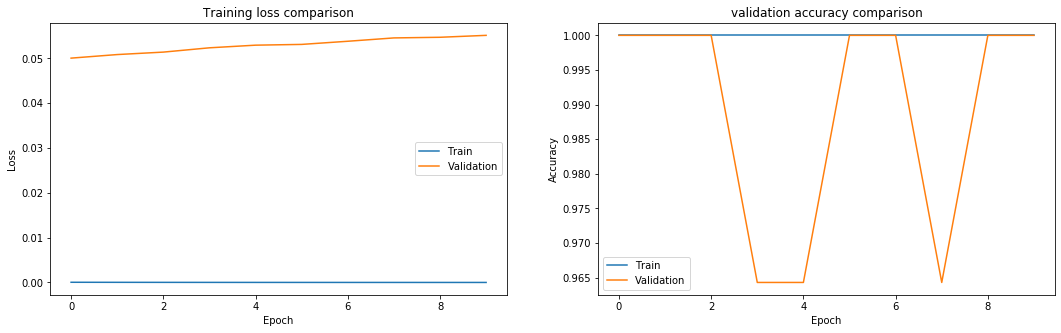

In [25]:
# YOUR CODE HERE
train_accs_vgg_unfreeze=[]
train_losses_vgg_unfreeze=[]
val_accs_vgg_unfreeze=[]
val_losses_vgg_unfreeze=[]
for epoch in range(10):
    losses_vgg_unfreeze = []
    for b_x, b_y in small_train_loader:
        bx = b_x.to(device)
        by = b_y.to(device)
        # Compute predictions and losses
        pred_vgg_unfreeze = vgg16(bx)
        loss_vgg_unfreeze = loss_fn(pred_vgg_unfreeze, by)
        losses_vgg_unfreeze.append(loss_vgg_unfreeze.item())
        
        # Count number of correct predictions
        hard_preds_vgg_unfreeze = pred_vgg_unfreeze.argmax(dim=1)
        acc_vgg_t_unfreeze=accuracy_score(by.cpu(), hard_preds_vgg_unfreeze.cpu())

        # Backpropagate
        loss_vgg_unfreeze.backward()
        optimizer_vgg_unfreeze.step()
        optimizer_vgg_unfreeze.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accs_vgg_unfreeze.append(acc_vgg_t_unfreeze)
    train_losses_vgg_unfreeze.append(sum(losses_vgg_unfreeze)/len(losses_vgg_unfreeze))
        
    # Compute accuracy and loss in the entire validation set
    val_acc_v_unfreeze, val_loss_v_unfreeze = evaluate_model(small_valid_loader, small_valid_data, vgg16, loss_fn)
    val_accs_vgg_unfreeze.append(val_acc_v_unfreeze)
    val_losses_vgg_unfreeze.append(val_loss_v_unfreeze)
        
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss (train): {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy (train): {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_losses_vgg_unfreeze[epoch], val_losses_vgg_unfreeze[epoch], train_accs_vgg_unfreeze[epoch], val_accs_vgg_unfreeze[epoch]))
    
fig = plt.figure(figsize=(18,5))

# Plotting the training accuracy
plt.subplot(1,2,1)
plt.plot(train_losses_vgg_unfreeze)
plt.plot(val_losses_vgg_unfreeze)
plt.title('Training loss comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Plotting the validation accuracy
plt.subplot(1,2,2)
plt.plot(train_accs_vgg_unfreeze)
plt.plot(val_accs_vgg_unfreeze)
plt.title('validation accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Show the plots
plt.show()  

How does the model perform, compared to the model trained with freezed layers? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

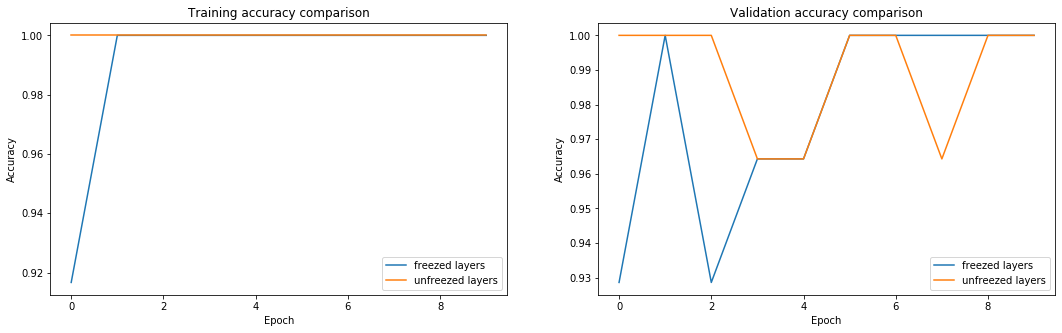

In [26]:
# YOUR CODE HERE
fig = plt.figure(figsize=(18,5))

# Plotting the training accuracy
plt.subplot(1,2,1)
plt.plot(train_accs_vgg)
plt.plot(train_accs_vgg_unfreeze)
plt.title('Training accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['freezed layers','unfreezed layers'])

# Plotting the validation accuracy
plt.subplot(1,2,2)
plt.plot(val_accs_vgg)
plt.plot(val_accs_vgg_unfreeze)
plt.title('Validation accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['freezed layers','unfreezed layers'])

# Show the plots
plt.show()

**(1 POE)** Did the model's performance improve? Why (why not)?

**Your answer:** (fill in here)<br>
When we use unfreezen layers, it means we use all the weights in vgg16 model. The accuracy is more stable than when we freeze layers.

Save the model to file.

In [31]:
torch.save(vgg16.state_dict(), 'trans_learning_full')

### 4.3 Improving the top model (optional)

Improve the architecture for the layers you add on top of VGG16. Try different ideas! When you're happy with one architecture, copy it in the cell below and train it here.

In [29]:
# YOUR CODE HERE
vgg16.classifier = torch.nn.Sequential(torch.nn.Linear(25088, 4096),
                                       torch.nn.ReLU(),
                                       torch.nn.Dropout(p=0.5),
                                       torch.nn.Linear(4096, 4096),
                                       torch.nn.ReLU(),
                                       torch.nn.Dropout(p=0.5),
                                       torch.nn.Linear(4096, 2))

optimizer_vgg_new = torch.optim.Adam(vgg16.parameters(), lr=1e-5)   # optimize all cnn parameters
vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

**(1 POE)** How does the model perform, compared to the model trained in step 4.2? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

Epoch 0 	Loss (train): 0.093 	Loss (val): 0.065	Accuracy (train): 1.00 	Accuracy (val): 0.93
Epoch 1 	Loss (train): 0.007 	Loss (val): 0.051	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 2 	Loss (train): 0.002 	Loss (val): 0.052	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 3 	Loss (train): 0.001 	Loss (val): 0.059	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 4 	Loss (train): 0.001 	Loss (val): 0.055	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 5 	Loss (train): 0.000 	Loss (val): 0.061	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 6 	Loss (train): 0.000 	Loss (val): 0.073	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 7 	Loss (train): 0.000 	Loss (val): 0.076	Accuracy (train): 1.00 	Accuracy (val): 1.00
Epoch 8 	Loss (train): 0.000 	Loss (val): 0.065	Accuracy (train): 1.00 	Accuracy (val): 0.96
Epoch 9 	Loss (train): 0.000 	Loss (val): 0.069	Accuracy (train): 1.00 	Accuracy (val): 0.96


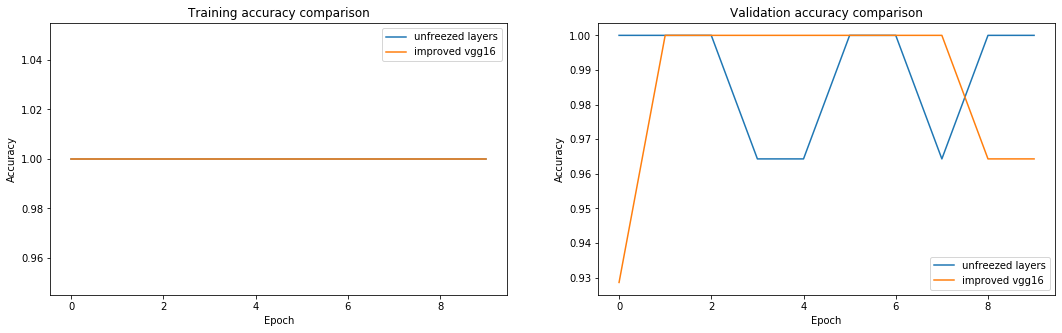

In [30]:
# YOUR CODE HERE
train_accs_vgg_new=[]
train_losses_vgg_new=[]
val_accs_vgg_new=[]
val_losses_vgg_new=[]
for epoch in range(10):
    losses_vgg_new = []
    n_correct_vgg_new = 0
    for b_x, b_y in small_train_loader:
        bx = b_x.to(device)
        by = b_y.to(device)
        # Compute predictions and losses
        pred_vgg_new = vgg16(bx)
        loss_vgg_new = loss_fn(pred_vgg_new, by)
        losses_vgg_new.append(loss_vgg_new.item())
        
        # Count number of correct predictions
        hard_preds_vgg_new = pred_vgg_new.argmax(dim=1)
        acc_vgg_t_new=accuracy_score(by.cpu(), hard_preds_vgg_new.cpu())

        # Backpropagate
        loss_vgg_new.backward()
        optimizer_vgg_new.step()
        optimizer_vgg_new.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accs_vgg_new.append(acc_vgg_t_new)
    train_losses_vgg_new.append(sum(losses_vgg_new)/len(losses_vgg_new))
        
    # Compute accuracy and loss in the entire validation set
    val_acc_v_vgg_new, val_loss_v_vgg_new = evaluate_model(small_valid_loader, small_valid_data, vgg16, loss_fn)
    val_accs_vgg_new.append(val_acc_v_vgg_new)
    val_losses_vgg_new.append(val_loss_v_vgg_new)
        
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss (train): {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy (train): {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_losses_vgg_new[epoch], val_losses_vgg_new[epoch], train_accs_vgg_new[epoch], val_accs_vgg_new[epoch]))
    

# Plotting the training accuracy
fig = plt.figure(figsize=(18,5))

# Plotting the training accuracy
plt.subplot(1,2,1)
plt.plot(train_accs_vgg_unfreeze)
plt.plot(train_accs_vgg_new)
plt.title('Training accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['unfreezed layers','improved vgg16'])

# Plotting the validation accuracy
plt.subplot(1,2,2)
plt.plot(val_accs_vgg_unfreeze)
plt.plot(val_accs_vgg_new)
plt.title('Validation accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['unfreezed layers','improved vgg16'])

# Show the plots
plt.show()

### Save the model to a file.

In [ ]:
torch.save(vgg16.state_dict(), 'best_trans_learning')

## 5. Final training

Now we'll train the model that achieved the best performance so far using the entire dataset.

**Note**: start the optimization with the weights you obtained training in the smaller subset, i.e. *not* from scratch.

First, create two new data generators, one for training samples and one for validation samples. This time, they'll load data from the folders for the entire dataset.

In [32]:
# YOUR CODE HERE
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 10

# convert data to a normalized torch.FloatTensor
train_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

val_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# choose the training and test datasets
train_data = datasets.ImageFolder(train_path, transform=train_transforms)
valid_data = datasets.ImageFolder(val_path,transform=val_transforms)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers,shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,  num_workers=num_workers,shuffle=True)

Train your model using the full data. This optimization might take a long time, so live plotting of some metrics is recommended.

In [33]:
# YOUR CODE HERE
torch.save(vgg16.state_dict(), 'final_trans_learning')

How does the model perform now when trained on the entire dataset, compared to when only trained on the smaller subset of data? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE
all_train_accs=[]
all_train_losses=[]
all_val_accs=[]
all_val_losses=[]
for epoch in range(10):
    all_losses = []
    for b_x, b_y in train_loader:
        all_bx = b_x.to(device)
        all_by = b_y.to(device)
        # Compute predictions and losses
        all_pred = vgg16(all_bx)
        all_loss = loss_fn(all_pred, all_by)
        all_losses.append(all_loss.item())
        
        # Count number of correct predictions
        all_hard_preds = all_pred.argmax(dim=1)
        all_acc_vgg_t_new=accuracy_score(all_by.cpu(), all_hard_preds.cpu())

        # Backpropagate
        all_loss.backward()
        optimizer_vgg_new.step()
        optimizer_vgg_new.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    all_train_accs.append(all_acc_vgg_t_new)
    all_train_losses.append(sum(all_losses)/len(all_losses))
        
    # Compute accuracy and loss in the entire validation set
    all_val_acc_v_vgg_new, all_val_loss_vgg_new = evaluate_model(valid_loader, valid_data, vgg16, loss_fn)
    all_val_accs.append(all_val_acc_v_vgg_new)
    all_val_losses.append(all_val_loss_vgg_new)
        
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss (train): {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy (train): {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, all_train_losses[epoch], all_val_losses[epoch], all_train_accs[epoch], all_val_accs[epoch]))
    

# Plotting the training accuracy
fig = plt.figure(figsize=(18,5))

# Plotting the training accuracy
plt.subplot(1,2,1)
plt.plot(train_accs_vgg)
plt.plot(all_train_accs)
plt.title('Training accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['smaller training dataset','all training dataset'])

# Plotting the validation accuracy
plt.subplot(1,2,2)
plt.plot(val_accs_vgg)
plt.plot(all_val_accs)
plt.title('Validation accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['smaller training dataset','all training dataset'])

# Show the plots
plt.show()

**(2 POE)** What can you conclude from these plots?

**Your answer:** (fill in here)<br>
From the result, we can see, the model performs good for the smaller dataset and the whole dataset. At first, we only put epoch=3, this time we try to put epoch=10 to get a better plot. However, the whole dataset is so big, we can't get the result for epoch=10 before deadline. We answer this question based on the result and plot we get berfore when we put epoch=3. (we just click the stop button, we can see the program is on the processing to put our data to device.)

## 6. Evaluation on test set

Now we'll evaluate your final model, obtained in step 6, on the test set. As mentioned before, the samples in the test set are not labeled, so we can't compute any performance metrics ourselves. Instead, we'll create a .csv file containing the predictions for each sample, and submit it to Kaggle for evaluation.

Compute the predictions for all samples in the test set according to your best model, and save it in a .csv file with the format expected by the competition.

Hints:
- There is a sample_submission file available for download in the same place where you downloaded the data from. Take a look at it to better understand what is the expected format here.
- The Python module `os` has a `listdir` function, which returns the filenames of all files in a given path.
- If you don't know how to create and write to files with Python, Google can help.

In [ ]:
# YOUR CODE HERE
import os
from os import listdir
from os.path import basename
import pandas as pd
import numpy
from PIL import Image 
import matplotlib.image as mpimg

test = os.listdir(home_path + '/test')
test = [fname for fname in test if fname != '.ipynb_checkpoints']

id_list = []
pred_list = []
test_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

with torch.no_grad():
    for image_name in test:
        id_list.append(image_name[0:-4])
        im = Image.open(home_path + '/test/'+image_name)
        im = test_transforms(im)
        im = im.view(1, 3, 224,224)
        im = im.to(device)
        pred = vgg16(im)
        hard_preds = pred.argmax(dim=1).item()
        pred_list.append(hard_preds)

submission = pd.DataFrame({"id":id_list, "label":pred_list})
submission.to_csv('output.csv', index=False)

**(2 POE)** Now that you created your submission file, submit it to Kaggle for evaluation. The [old competition](https://www.kaggle.com/c/dogs-vs-cats) does not allow submissions any more, so submit your file to the [new one](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition). Kaggle evaluates your submission according to your log-loss score. Which score did you obtain?

**Your answer:** (fill in here)<br>
0.48078

What was the username you used for this submission?

**Your answer:** (fill in here)<br>
jocelyn666